# Тетрадь 5: Элементарная классификация

***

## Теория

Классификация — это одна из ключевых задач в машинном обучении, которая заключается в отнесении
объектов к одному из заранее определённых классов на основе их признаков. Классификация широко
применяется в различных областях, таких как распознавание изображений, фильтрация спама,
медицинская диагностика, кредитный скоринг и многих других.

### Основные принципы работы моделей классификации

1. **Признаки (Features)** — это характеристики объектов, которые используются для классификации.
Например, для классификации писем на спам и не спам признаками могут быть частота употребления
определённых слов, длина письма и т.д.
2. **Классы (Labels)** — это категории, к которым относятся объекты. В задаче классификации писем
это может быть «спам» или «не спам».
3. **Обучение модели** — процесс, при котором модель на основе обучающих данных (набор объектов с
известными классами) находит закономерности, позволяющие предсказывать класс новых объектов.
4. **Предсказание** — применение обученной модели к новым данным для определения их класса.

### Типы моделей классификации

#### Логистическая регрессия (Logistic Regression)

- Используется для бинарной классификации.
- Модель оценивает вероятность принадлежности объекта к одному из классов на основе линейной
комбинации признаков.

**Пример:** предсказание, будет ли клиент возвращать кредит.

#### Деревья решений (Decision Trees)

- Модель строит дерево, где каждый узел представляет собой условие на основе признаков, а листья —
классы.
- Проста в интерпретации, но склонна к переобучению.

**Пример:** классификация клиентов по уровню дохода.

#### Случайный лес (Random Forest)

- Ансамбль деревьев решений, где каждое дерево обучается на случайной подвыборке данных.
- Уменьшает риск переобучения и повышает точность.

**Пример:** предсказание оттока клиентов.

#### Метод k-ближайших соседей (KNN)

Непараметрический метод, который классифицирует объект на основе классов его ближайших соседей в
пространстве признаков.

**Пример:** распознавание рукописного текста.

#### Нейронные сети

- Используются для сложных задач, таких как классификация изображений или текстов.
- Состоят из множества слоёв, которые автоматически извлекают признаки из данных.

**Пример:** распознавание лиц.

#### Наивный байесовский классификатор
- Основан на теореме Байеса и предположении о независимости признаков.
- Эффективен для текстовой классификации.

**Пример:** фильтрация спама.

***

In [ ]:
import matplotlib.pyplot as plt

from modules.metrics import ConfusionMatrix


def plot_confusion_matrix(
    confusion_matrix: ConfusionMatrix, title: str
) -> None:
    matrix, _ = confusion_matrix
    figure, axis = plt.subplots()
    ticks = list(range(0, len(matrix)))

    axis.set_yticks(ticks)
    axis.set_xticks(ticks)
    axis.set_xlabel("Actual")
    axis.set_ylabel("Predicted")
    for i, _ in enumerate(matrix):
        for j, _ in enumerate(matrix):
            # fmt: off
            axis.text(
                j, i,
                int(matrix[i, j]),
                verticalalignment="center",
                horizontalalignment="center",
                color="white",
            )
            # fmt: on
    axis.set_title("Confusion Matrix" if title is None else "", fontsize=14)
    to_show = plt.imshow(matrix, cmap="seismic")
    figure.colorbar(to_show, label="Samples")

    plt.tight_layout()
    plt.show()

## Код и примеры

Прежде чем перейти к примерам, воспользуемся полезной техникой из тетради 1.2.

### Базовый класс моделей

Определим абстрактный базовый класс, который будет описывать устройство модели и сигнатуры её
методов.

In [2]:
from abc import ABC, abstractmethod
from logging import basicConfig, INFO
from typing import Any

from numpy import ndarray


class ModelBase(ABC):
    """Base machine learning model class."""

    def __init__(self) -> None:
        self.x_train: ndarray
        self.y_train: ndarray
        basicConfig(format="Model: %(message)s", level=INFO)

    @abstractmethod
    def fit(self, x_train: ndarray, y_train: ndarray, *args, **kwargs) -> None:
        """The data passed to this method would be copied and used as
        NumPy :class:`ndarray`.
        """
        self.x_train, self.y_train = x_train, y_train

    @abstractmethod
    def predict(self, x_test: ndarray) -> Any:
        message = "Every model should implement the `predict()` method"
        raise NotImplementedError(message)

Образ взаимодействия позаимствован у моделей из Scikit-Learn. В этом фреймворке так же у модели
среди прочих есть два основных метода: `fit()` и `predict()`, которые отвечают за процессы обучения
и прогнозирования соответсвенно.

### Элементарный классификатор

На основе `ModelBase` реализуем теперь свой элементарный классификатор. Допустим, есть всего два
класса (0 и 1) и один признак. Значения признака могут варьироватся от 0 до 1. Если значение
признака больше его стандартного отклонения по обучающим данным, он принадлежит первому классу,
если меньше или равно — второму.

In [3]:
import numpy as np


class ElementaryClassifier(ModelBase):
    # Elementary Classifier inherits from Model Base to provide method
    # signatures.

    def __init__(self) -> None:
        super().__init__()

    def fit(self, x_train: ndarray, y_train: ndarray, *args, **kwargs) -> None:
        # This method memorizes the training data and calculates the standard
        # deviation of the training features.
        super().fit(x_train, y_train)
        self.x_train_std = np.std(self.x_train)

    def predict(self, x_test: ndarray) -> ndarray:
        # This method classifies the data points
        pred = list()
        for x in x_test:
            if x > self.x_train_std:
                pred.append(0)
            else:
                pred.append(1)
        pred_arr = np.array(pred)
        return pred_arr

Стоит отметить одну небольшую оптимизацию. Мы всего единажды вычисляем `np.std(self.x_train)`,
вместо того, чтобы каждый раз повторять вычисления в цикле в `predict()`. Потом нужно будет лишь
сравнить данное число с точкой данных в тестовом наборе. На масштабе такая техника позволяет
значительно сократить время прогнозирования.

Посмотрим, как наш классификатор отработает на случайных данных.

In [4]:
from modules.preprocessing import DataSplitter


random_features = np.array([np.random.random() for _ in range(100)])
fstd = np.std(random_features)
classes = np.array([0 if fval > fstd else 1 for fval in random_features])

Не забудем воспользоваться разделителем данных из первого модуля.

In [5]:
splitter = DataSplitter(permute=True)
x_train, x_test, y_train, y_test = splitter.split_data(
    random_features, classes, test_size=0.33
)

Применим `ElementaryClassifier`.

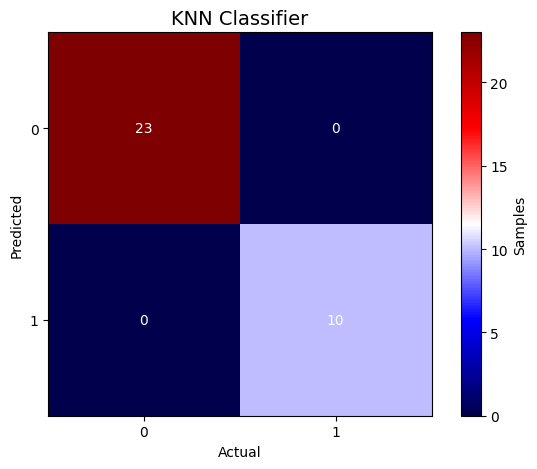

In [8]:
from modules.metrics import compute_confusion_matrix


classifier = ElementaryClassifier()

classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)
confusion_matrix = compute_confusion_matrix(
    y_test.reshape((-1, 1)), y_predicted.reshape((-1, 1))
)

plot_confusion_matrix(confusion_matrix)

***

## Задание

***

### Заключение

Классификация — это мощный инструмент машинного обучения, который позволяет решать множество
практических задач. Выбор модели зависит от характера данных, объёма выборки и требуемой точности.
KNN, несмотря на свою простоту, остаётся популярным методом, особенно для небольших наборов данных
и задач, где важна интерпретируемость результатов.